In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import csv
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.patches as patches
import random

def rotation(img, n):
    rotate=iaa.Affine(rotate=(-n, n))
    rotated_image=rotate.augment_image(img)
    return rotated_image

def crop(img, n):
    crop = iaa.Crop(percent=(n, n)) # crop image
    crop_image=crop.augment_image(img)
    return crop_image

def sheer(img, n):
    shear = iaa.Affine(shear=(-n,n))
    shear_image=shear.augment_image(img)
    return shear_image

def hor_flip(img):
    flip_hr=iaa.Fliplr(p=1.0)
    flip_hr_image= flip_hr.augment_image(img)
    return flip_hr_image

def dilate(img, n):
    kernel = np.ones((n,n),np.uint8)
    dilated_image = cv2.dilate(trainxs[800],kernel,iterations = 1)
    return dilate_image

def trans(img, n):
    num = random.randrange(int(n*-1),int(n))
    move=iaa.Affine(translate_percent={"x": num/100}, scale=1)
    trans_image = move.augment_image(img)
    return trans_image




    

In [27]:
trainxs = []
trainys = []
trainxs2 =[]
with open("/home/jupyter/MEng-Project/insight46labels.csv", newline='') as csvfile:
    data = list(csv.reader(csvfile))
    trainystr = data[0]
trainys = [int(i) for i in trainystr]
#print(trainys)

In [28]:
path = "/home/jupyter/MEng-Project/insight46png"
for img in tqdm(sorted(os.listdir(path))):  # iterate over each image per point value
    img_array = cv2.imread(os.path.join(path,img) ,0)  # convert to array
    img_array = cv2.resize(img_array, (300, 300))
    img_array = cv2.bitwise_not(img_array)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(img_array,kernel,iterations = 1)
    trainxs.append(dilate)  # add this to our training_data
    #trainxs.append(img_array)
#trainxs = np.array(trainxs, dtype="float") / 255.0
#trainys = np.array(trainys)

100%|██████████| 991/991 [00:04<00:00, 222.40it/s]


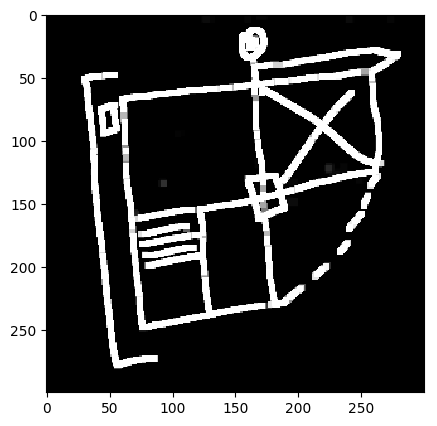

In [29]:
plt.imshow(trainxs[1], "gray")

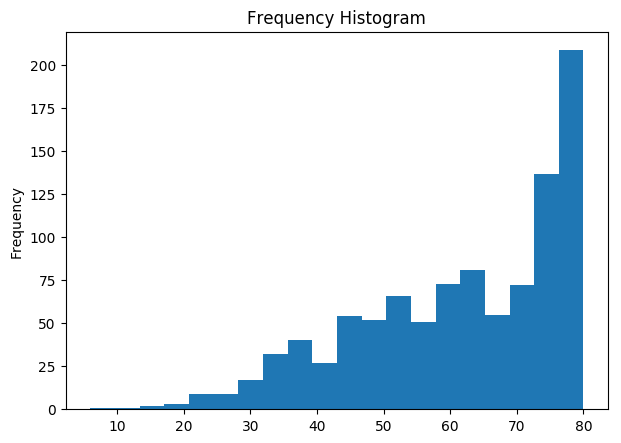

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(trainys, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [31]:
'''
for i,y in enumerate(trainys):
    if trainys[i] > 75:
        trainys[i] = 3
    elif trainys[i] <=75 and trainys[i] >55:
        trainys[i] = 2
    #elif trainys[i] <=40 and trainys[i] >20:
    #    trainys[i] = 1
    else:
        trainys[i] = 0

'''

'\nfor i,y in enumerate(trainys):\n    if trainys[i] > 75:\n        trainys[i] = 3\n    elif trainys[i] <=75 and trainys[i] >55:\n        trainys[i] = 2\n    #elif trainys[i] <=40 and trainys[i] >20:\n    #    trainys[i] = 1\n    else:\n        trainys[i] = 0\n\n'

In [32]:
for i,y in enumerate(trainys):
    if trainys[i] > 60:
        trainys[i] = 2
    elif trainys[i] <=60 and trainys[i] >40:
        trainys[i] = 1
    else:
        trainys[i] = 0


In [33]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

batch_size = 32
epochs = 15

# input image dimensions
img_rows, img_cols = 300, 300


import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)


trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.int)
#print(trainys)



x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=40)
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)


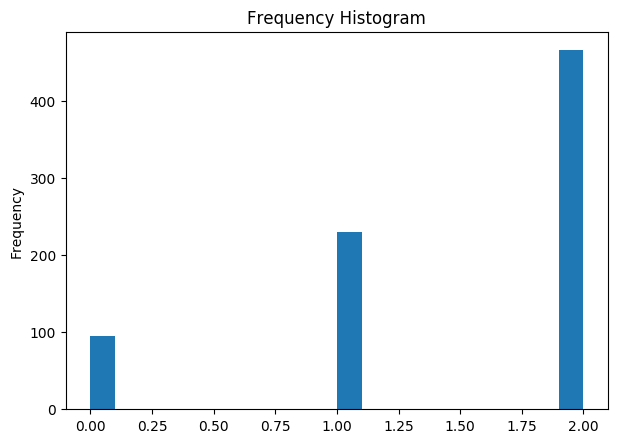

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(y_train_old, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [35]:
'''
for i,y in enumerate(x_train):
    if y_train_old[i] == 2:
        new_img_array1 = crop(x_train[i], 0.1)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = sheer(x_train[i], 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
    if y_train_old[i] == 1:
        new_img_array1 = crop(x_train[i], 0.1)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = sheer(x_train[i], 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array3 = trans(x_train[i], 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array4 = rotation(x_train[i], 10)
        new_img_array4 = np.asarray(new_img_array4, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array4[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
    
    if y_train_old[i] == 0:
        
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = sheer(x_train[i], 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array3 = trans(x_train[i], 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array4 = rotation(x_train[i], 10)
        new_img_array4 = np.asarray(new_img_array4, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array4[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array5 = crop(x_train[i], 0.1)
        new_img_array5 = np.asarray(new_img_array5, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array5[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array6 = sheer(x_train[i], 10)
        new_img_array6 = np.asarray(new_img_array6, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array6[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array7 = trans(x_train[i], 10)
        new_img_array7 = np.asarray(new_img_array7, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array7[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array8 = rotation(x_train[i], 10)
        new_img_array8 = np.asarray(new_img_array8, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array8[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
'''

for i,y in enumerate(x_train):
    if y_train_old[i] == 2:
        continue
    if y_train_old[i] == 1:
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

    if y_train_old[i] == 0:
        
        new_img_array1 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array1 = np.asarray(new_img_array1, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array1[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array2 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array2 = np.asarray(new_img_array2, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array2[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array3 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array3 = np.asarray(new_img_array3, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array3[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])

        new_img_array4 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array4 = np.asarray(new_img_array4, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array4[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])
        
        new_img_array5 = trans(rotate(crop(x_train[i], 0.1),20), 10)
        new_img_array5 = np.asarray(new_img_array5, dtype=np.float32)
        x_train = np.vstack((x_train,new_img_array5[None]))
        y_train_old = np.append(y_train_old, y_train_old[i])




In [36]:
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)
x_train.shape

(1497, 300, 300)

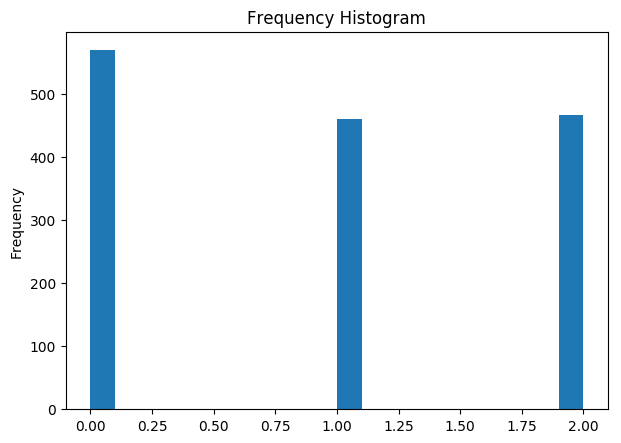

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(y_train_old, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [38]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(1497, 300, 300, 1)

In [116]:
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
class_weight = {0: 2.,
                1: 1.,
                2: 0.5}

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(356, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (3406, 300, 300, 1)
y_train shape: (3406, 3)
3406 train samples
199 test samples
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
average_pooling2d_12 (Averag (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 128)       0         
________________________

In [117]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
                    #, class_weight=class_weight)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3406 samples, validate on 199 samples
Epoch 1/15
3406/3406 [==============================] - 26s 8ms/step - loss: 1.0157 - accuracy: 0.4521 - val_loss: 0.6727 - val_accuracy: 0.6734
Epoch 2/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.8076 - accuracy: 0.6230 - val_loss: 0.6740 - val_accuracy: 0.6533
Epoch 3/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.6934 - accuracy: 0.7035 - val_loss: 0.5802 - val_accuracy: 0.6985
Epoch 4/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.5924 - accuracy: 0.7572 - val_loss: 0.5407 - val_accuracy: 0.7487
Epoch 5/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.4812 - accuracy: 0.8062 - val_loss: 0.5397 - val_accuracy: 0.7538
Epoch 6/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.3903 - accuracy: 0.8529 - val_loss: 0.7609 - val_accuracy: 0.7035
Epoch 7/15
3406/3406 [==============================] - 25s 7ms/step - loss: 0.2932

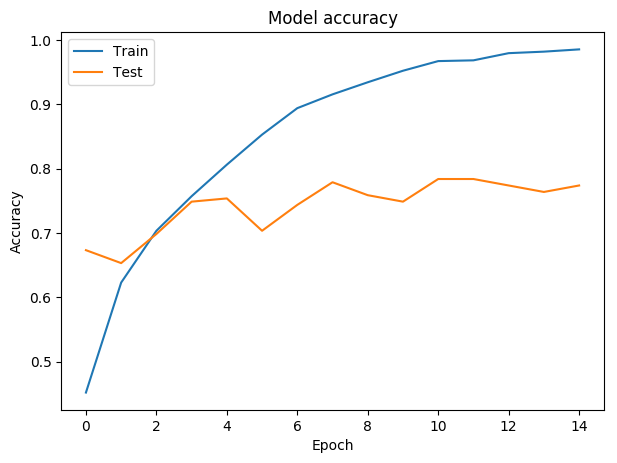

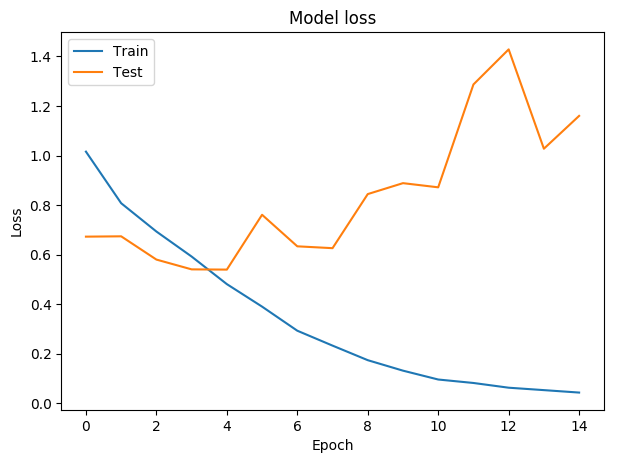

In [118]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [119]:
pred = model.predict_classes(x_test)

In [123]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix


#cm=confusion_matrix(y_test_old,pred, normalize='true')
cm=confusion_matrix(y_test_old, pred)
print(cm)

[[ 8 19  0]
 [ 3 47 15]
 [ 0  8 99]]


In [120]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test_old, pred, average='weighted'))
print(precision_score(y_test_old, pred, average='weighted'))
print(recall_score(y_test_old, pred, average='weighted'))

0.7597462762747279
0.7730713570438511
0.7738693467336684


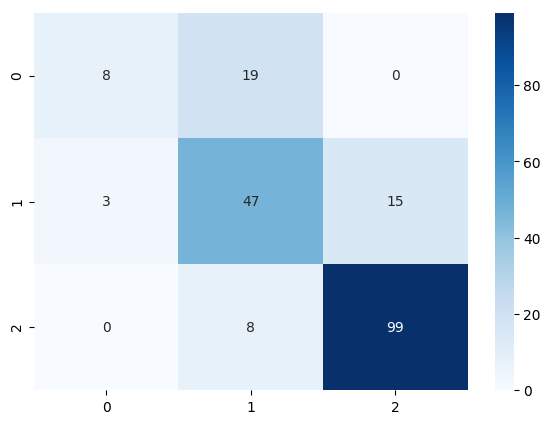

In [124]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm,annot=True,cmap='Blues', fmt='g')

#### from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(trainxs,
	trainys, test_size=0.1)

# **Testing Gradient boosing regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(trainX, trainY)

# Make predictions on the test data
predictions = gradient_boosted.predict(testX)

# Evaluate the model
mae = np.mean(abs(predictions - testY))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

ValueError: ignored

In [ ]:
print(testY)

In [ ]:
print(predictions)

In [ ]:
plt.plot(testY,predictions,'.')
plt.show()

In [ ]:
np.mean([abs(t-65.13) for t in testY])

# **Testing linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(trainX, trainY)

# Make predictions on the test data
predictions1 = linear_regression.predict(testX)

# Evaluate the model
mae = np.mean(abs(predictions1 - testY))

print('Linear regression Performance on the test set: MAE = %0.4f' % mae)

In [ ]:
print(testY)

In [ ]:
print(predictions1)